In [1]:
import os
import sys

# Add the project's root directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import random

import numpy as np
import torch

from GP_comp.GP import generate_grids
from SGLD_v7 import SgldBayesianRegression as V7, select_significant_voxels
from models.stgp_neural_network import STGPNeuralNetwork
from simulate_single_modality import simulate_data
from utils import generate_linear_data, plot_values
# Set random seed for reproducibility
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)



In [2]:
in_feature = 6

In [3]:
# Step 2: Generate synthetic data
X, y, true_weights, true_bias = generate_linear_data(n=1000, in_features=in_feature, noise_std=1.0)
print(f"Shape of X: {X.shape}")



Shape of X: torch.Size([1000, 6])


In [4]:
# Step 3: Generate spatial grid
grids = generate_grids(dimensions=1, num_grids=in_feature, grids_lim=(-1, 1))
inputs = torch.ones(in_feature)
expected_y = sum(true_weights) + true_bias

In [5]:
# Step 4: Build model
model = STGPNeuralNetwork(
    in_feature=in_feature,
    grids=grids,
    fully_connected_layers=[10, 50, 1],
    dimensions=1,
)

In [6]:
# Step 5: Train with SGLD
trainer = V7(
    step_size=0.000005,
    num_epochs=300,  # fix this back to 300 later
    burn_in_epochs=100,
    batch_size=100,
    model=model
)
trainer.train(X, y)

Epoch 1/300
Epoch 101/300
Epoch 201/300


In [7]:
print(f"true_weight={true_weights} true_bias={true_bias}")
print(f"X={inputs} Y(predicted)={trainer.predict(inputs, gamma=None)} Y(expected)={expected_y}")

true_weight=tensor([1., 2., 3., 4., 5., 6.]) true_bias=-1.0
predict (sample_avg)::variance_prediction=[1.2692199]
X=tensor([1., 1., 1., 1., 1., 1.]) Y(predicted)=tensor([20.3550]) Y(expected)=20.0


In [8]:
print(trainer.samples['mse'])

[14893.9072265625, 14930.6474609375, 15580.861328125, 16428.314453125, 17803.90234375, 15351.97265625, 14427.7998046875, 11324.4697265625, 13278.7646484375, 13910.03515625, 14670.5048828125, 14712.5078125, 13661.5234375, 14675.67578125, 14721.818359375, 13278.8076171875, 12113.2265625, 13944.74609375, 13939.8583984375, 14512.6259765625, 14082.1728515625, 14627.2900390625, 16020.4453125, 12589.1533203125, 14697.94921875, 13212.8125, 11586.6689453125, 12072.638671875, 13754.16015625, 10838.830078125, 11955.3798828125, 12997.4990234375, 14509.423828125, 12989.349609375, 12793.1689453125, 12092.708984375, 11885.01953125, 9079.1953125, 14628.615234375, 13643.35546875, 11601.91015625, 12272.9072265625, 12321.4404296875, 11393.255859375, 11520.2958984375, 13059.0029296875, 12705.6650390625, 13037.25, 11905.611328125, 11878.4951171875, 12301.736328125, 11850.9453125, 12144.875, 12000.0966796875, 11782.2021484375, 12852.96484375, 10141.056640625, 10984.1826171875, 10798.0234375, 10893.24609375,

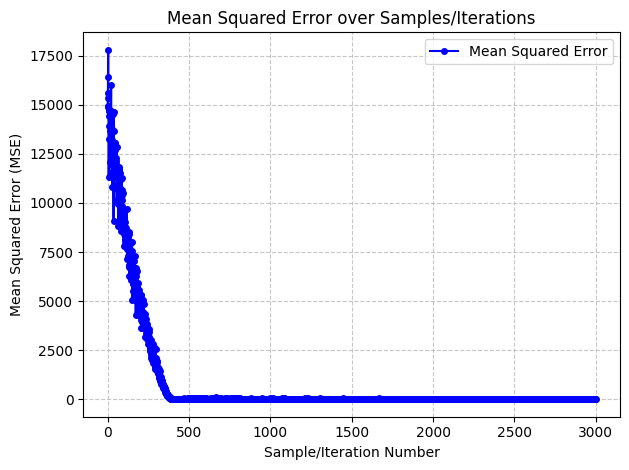

In [9]:
plot_values(trainer.samples['mse'], 'Mean Squared Error', 'Mean Squared Error over Samples/Iterations', 'Sample/Iteration Number', 'Mean Squared Error (MSE)')

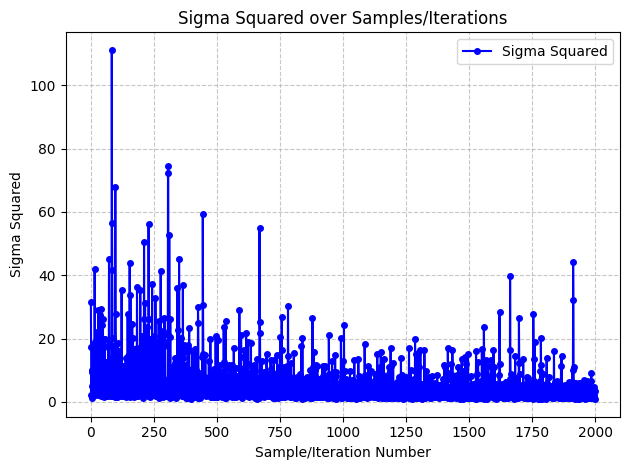

In [10]:
plot_values(trainer.samples['sigma'], 'Sigma Squared', 'Sigma Squared over Samples/Iterations', 'Sample/Iteration Number', 'Sigma Squared')